In [1]:
import pandas as pd
import nltk
from textblob import TextBlob
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



In [2]:
df = pd.read_csv('../Data/raw_analyst_ratings.csv')
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [3]:
df['date'] = pd.to_datetime(df['date'], format='ISO8601')

In [4]:
#converted to lower case
df["cleaned_headline"] = df["headline"].str.lower()
df["cleaned_headline"].head()


0              stocks that hit 52-week highs on friday
1           stocks that hit 52-week highs on wednesday
2                        71 biggest movers from friday
3         46 stocks moving in friday's mid-day session
4    b of a securities maintains neutral on agilent...
Name: cleaned_headline, dtype: object

In [5]:
#removed punctuation
def remove_punctuation(text):
    import string
    return text.translate(str.maketrans('', '', string.punctuation))
df["cleaned_headline"] = df["cleaned_headline"].apply(remove_punctuation)
df["cleaned_headline"].head()

0               stocks that hit 52week highs on friday
1            stocks that hit 52week highs on wednesday
2                        71 biggest movers from friday
3           46 stocks moving in fridays midday session
4    b of a securities maintains neutral on agilent...
Name: cleaned_headline, dtype: object

In [6]:
#removed special characters
import re

def find_special_chars(text):
    # Match non-ASCII, unusual punctuation, or invisible chars
    return re.findall(r'[^\w\s.,!?;:\'\"-]', text, re.UNICODE)

# Example usage:
sample_text = "“Smart” quotes–and emojis😊 cost ₹2000..."
print(find_special_chars(sample_text))  
# Output: ['“', '”', '–', '😊', '₹']

['“', '”', '–', '😊', '₹']


In [7]:
#REMOVE STOPWORDS
from nltk.corpus import stopwords
nltk.download('stopwords')
def remove_stopwords(text):
    from nltk.corpus import stopwords
    stop_words = set(stopwords.words('english'))
    return ' '.join([word for word in text.split() if word not in stop_words])

df["cleaned_headline"] = df["cleaned_headline"].apply(lambda x: remove_stopwords(x))
df["cleaned_headline"].head()

[nltk_data] Downloading package stopwords to /home/sasa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0                       stocks hit 52week highs friday
1                    stocks hit 52week highs wednesday
2                             71 biggest movers friday
3              46 stocks moving fridays midday session
4    b securities maintains neutral agilent technol...
Name: cleaned_headline, dtype: object

In [8]:
# Tokenization
from nltk.tokenize import word_tokenize

# Download punkt tokenizer if not already available
import nltk
nltk.download('punkt_tab')  # Specifically download the missing resource
nltk.download('punkt')      # Ensure the main punkt tokenizer is also available
def tokenize_text(text):
    return word_tokenize(text)

# Apply tokenization to your dataframe column
df["tokenized_headline"] = df["cleaned_headline"].apply(tokenize_text)
df["tokenized_headline"].head()

[nltk_data] Downloading package punkt_tab to /home/sasa/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /home/sasa/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0                 [stocks, hit, 52week, highs, friday]
1              [stocks, hit, 52week, highs, wednesday]
2                        [71, biggest, movers, friday]
3       [46, stocks, moving, fridays, midday, session]
4    [b, securities, maintains, neutral, agilent, t...
Name: tokenized_headline, dtype: object

In [9]:
#lemmatization
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()
def lemmatize_text(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

df["lemmatized_headline"] = df["tokenized_headline"].apply(lemmatize_text)
df.info()

[nltk_data] Downloading package wordnet to /home/sasa/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/sasa/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype                    
---  ------               --------------    -----                    
 0   Unnamed: 0           1407328 non-null  int64                    
 1   headline             1407328 non-null  object                   
 2   url                  1407328 non-null  object                   
 3   publisher            1407328 non-null  object                   
 4   date                 1407328 non-null  datetime64[ns, UTC-04:00]
 5   stock                1407328 non-null  object                   
 6   cleaned_headline     1407328 non-null  object                   
 7   tokenized_headline   1407328 non-null  object                   
 8   lemmatized_headline  1407328 non-null  object                   
dtypes: datetime64[ns, UTC-04:00](1), int64(1), object(7)
memory usage: 96.6+ MB


In [10]:
df["lemmatized_headline"].head()

0                   [stock, hit, 52week, high, friday]
1                [stock, hit, 52week, high, wednesday]
2                         [71, biggest, mover, friday]
3         [46, stock, moving, friday, midday, session]
4    [b, security, maintains, neutral, agilent, tec...
Name: lemmatized_headline, dtype: object

In [11]:
#the highest occurrence of a word in the lemmatized_headline column
from collections import Counter
def get_most_common_words(tokens_list, n=10):
    all_words = [word for tokens in tokens_list for word in tokens]
    return Counter(all_words).most_common(n)
# Get the 60 most common words
most_common_words = get_most_common_words(df["lemmatized_headline"], n=60)
print(most_common_words)

[('stock', 201091), ('v', 162683), ('est', 140632), ('eps', 128910), ('share', 126676), ('report', 124499), ('market', 120897), ('update', 93394), ('earnings', 87184), ('sale', 85318), ('top', 81250), ('price', 74210), ('pt', 73133), ('buy', 68660), ('lower', 68095), ('announces', 66528), ('company', 65423), ('downgrade', 63812), ('trading', 61163), ('raise', 59896), ('upgrade', 58999), ('target', 56338), ('benzingas', 54907), ('maintains', 52961), ('etf', 50029), ('estimate', 49939), ('52week', 49802), ('u', 49151), ('higher', 48163), ('new', 48062), ('session', 45810), ('inc', 45102), ('say', 44272), ('moving', 42264), ('see', 40864), ('q4', 40448), ('revenue', 39860), ('bank', 39642), ('premarket', 39322), ('q1', 38435), ('midday', 37881), ('q2', 37561), ('q3', 36822), ('high', 35956), ('energy', 35617), ('initiate', 35335), ('neutral', 34408), ('industry', 32996), ('scheduled', 32835), ('low', 32523), ('coverage', 32349), ('beat', 31391), ('morgan', 31065), ('biggest', 30818), ('ca

In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype                    
---  ------               --------------    -----                    
 0   Unnamed: 0           1407328 non-null  int64                    
 1   headline             1407328 non-null  object                   
 2   url                  1407328 non-null  object                   
 3   publisher            1407328 non-null  object                   
 4   date                 1407328 non-null  datetime64[ns, UTC-04:00]
 5   stock                1407328 non-null  object                   
 6   cleaned_headline     1407328 non-null  object                   
 7   tokenized_headline   1407328 non-null  object                   
 8   lemmatized_headline  1407328 non-null  object                   
dtypes: datetime64[ns, UTC-04:00](1), int64(1), object(7)
memory usage: 96.6+ MB


In [ ]:
import src.sentiment as sentiment_module
# Applying the sentiment analysis function to your headlines
df['Sentiment'] = calculate_sentiment(df['cleaned_headline'])

In [14]:
#print the first 70 sentiment values
df["Sentiment"].head(70)
#print 10 highest sentiment values
print("10 highest sentiment values:")
print(df.nlargest(10, 'Sentiment')[['headline', 'Sentiment']])
# Print the 10 lowest sentiment values
print("10 lowest sentiment values:")
print(df.nsmallest(10, 'Sentiment')[['headline', 'Sentiment']])
#print the higjhest sentiment value
#highest_sentiment = df.loc[df['Sentiment'].idxmax()]
#print("Headline with highest sentiment:")
#print(highest_sentiment['headline'])
# Print the highest sentiment value
#print("Highest sentiment value:", highest_sentiment['Sentiment'])
# Print the lowest sentiment value
#lowest_sentiment = df.loc[df['Sentiment'].idxmin()]
#print("Headline with lowest sentiment:")    

10 highest sentiment values:
                                               headline  Sentiment
819            Best Buy: Analysts' Upgrades, Downgrades        1.0
1343    OneMove(TM) Records its Best Month Ever in July        1.0
1382  Klondike Silver Completes Underground Drilling...        1.0
1849                             10 Best Stocks Of 2017        1.0
2270          Miners: The Best Way To Play A Rate Hike?        1.0
3635          Why 'Year's Best' Stocks May Flop in 2011        1.0
3637               10 Best Dow Dividend Stocks for 2011        1.0
3764  What Is The Best Aluminum Stock? (KALU, AA, AC...        1.0
3967  Market News – Bank of America (NYSE:BAC), Morg...        1.0
3968  Market News – Bank of America (NYSE:BAC), Morg...        1.0
10 lowest sentiment values:
                                               headline  Sentiment
2552  Tech, Semiconductors Among Worst Performers As...       -1.0
3175               I've just made a horrible investment       -1.0
5658 

In [15]:
#count the number of positive, negative and neutral headlines
positive_count = df[df['Sentiment'] > 0].shape[0]
negative_count = df[df['Sentiment'] < 0].shape[0]
neutral_count = df[df['Sentiment'] == 0].shape[0]
print(f"Number of positive headlines: {positive_count}")
print(f"Number of negative headlines: {negative_count}")
print(f"Number of neutral headlines: {neutral_count}")

Number of positive headlines: 341161
Number of negative headlines: 131239
Number of neutral headlines: 934928


sentiment_std:  0.18306517469233205


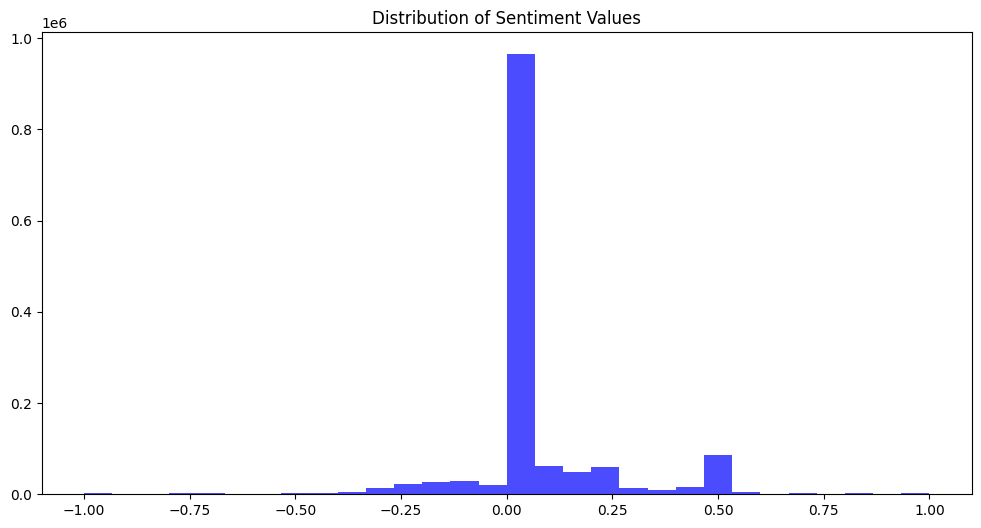

In [16]:

# Plot the distribution of sentiment values
plt.figure(figsize=(12, 6))
plt.hist(df['Sentiment'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Sentiment Values')

#calculate standart diviation
sentiment_std=df['Sentiment'].std()
print("sentiment_std: ",sentiment_std)


In [17]:
#Date separated by year month week day time
df['date'] = pd.to_datetime(df['date'], format='ISO8601')

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['week'] = df['date'].dt.isocalendar().week
df['day'] = df['date'].dt.day
df['time'] = df['date'].dt.time


In [18]:
#save the dataframe to a csv file
df.to_csv('../Data/new/processed_analyst_ratings.csv', index=False)